In [1]:
!pip install xlrd
import pandas as pd
df=pd.read_excel('Promotion_Train.xlsx')
df.head()

     |████████████████████████████████| 112kB 28.8MB/s eta 0:00:01


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Feature Engineering

In [2]:
df.drop(['employee_id'],axis=1,inplace=True)

df['education'].fillna(df['education'].mode()[0],inplace=True)

df['previous_year_rating'].fillna(df['previous_year_rating'].mean(),inplace=True)

df['department'].replace(to_replace=['Analytics','Finance','HR','Legal','Operations','Procurement','R&D','Sales & Marketing','Technology'],value=[1,2,3,4,5,6,7,8,9],inplace=True)

df['education'].replace(to_replace=["Below Secondary","Bachelor's","Master's & above"],value=[1,2,3],inplace=True)

df['gender'].replace(to_replace=['m','f'],value=[0,1],inplace=True)

df['recruitment_channel'].replace(to_replace=['other','referred','sourcing'],value=[1,2,3],inplace=True)

In [3]:
df.describe()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,5.972796,2.257627,0.297621,1.868158,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,2.506046,0.469717,0.457216,0.980713,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,5.000000,2.000000,0.000000,1.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,6.000000,2.000000,0.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,8.000000,3.000000,1.000000,3.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,9.000000,3.000000,1.000000,3.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## Data Visualization

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!pip install seaborn

In [6]:
import seaborn as sns

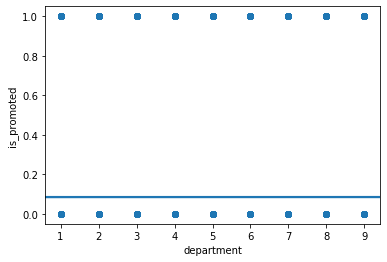

In [7]:
sns.regplot(x="department",y="is_promoted",data=df)

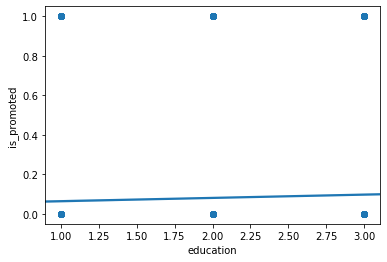

In [8]:
sns.regplot(x="education",y="is_promoted",data=df)

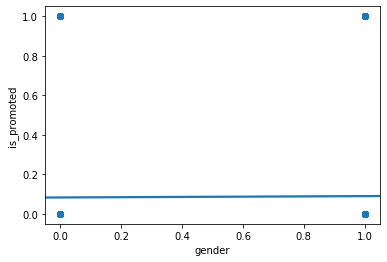

In [9]:
sns.regplot(x="gender",y="is_promoted",data=df)

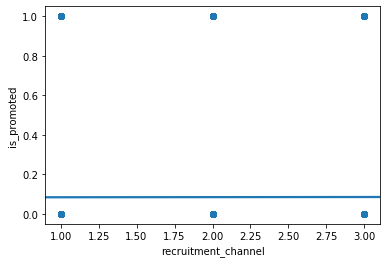

In [10]:
sns.regplot(x="recruitment_channel",y="is_promoted",data=df)

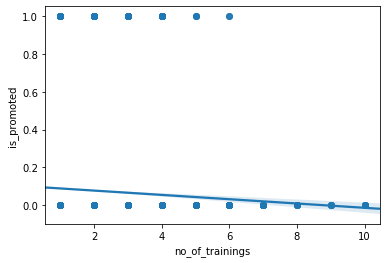

In [11]:
sns.regplot(x="no_of_trainings",y="is_promoted",data=df)

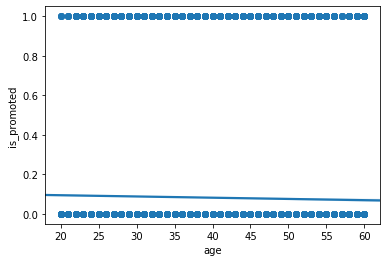

In [12]:
sns.regplot(x="age",y="is_promoted",data=df)

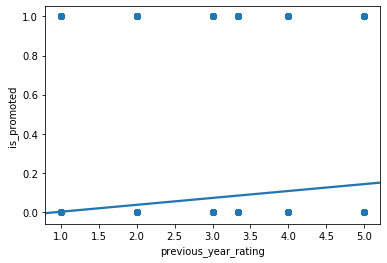

In [13]:
sns.regplot(x="previous_year_rating",y="is_promoted",data=df)

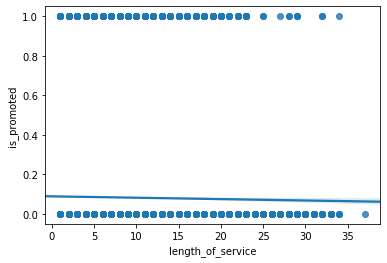

In [14]:
sns.regplot(x="length_of_service",y="is_promoted",data=df)

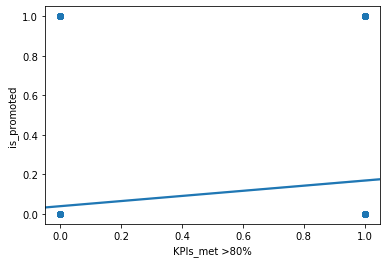

In [15]:
sns.regplot(x="KPIs_met >80%",y="is_promoted",data=df)

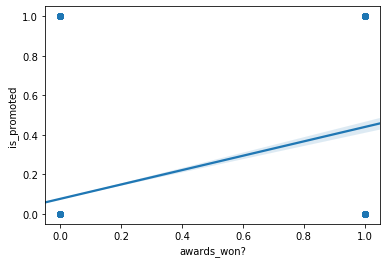

In [16]:
sns.regplot(x="awards_won?",y="is_promoted",data=df)

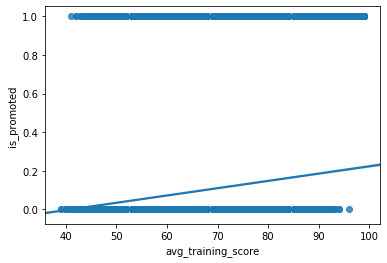

In [17]:
sns.regplot(x="avg_training_score",y="is_promoted",data=df)

## Feature Selection using Stats

In [18]:
from scipy.stats import pearsonr
pearson_coef,_=pearsonr(df["department"],df["is_promoted"])
pearson_coef

0.00013011609906073387

In [19]:
pearson_coef,_=pearsonr(df["education"],df["is_promoted"])
pearson_coef

0.028026370081191573

In [20]:
pearson_coef,_=pearsonr(df["gender"],df["is_promoted"])
pearson_coef

0.011109141143915691

In [21]:
pearson_coef,_=pearsonr(df["recruitment_channel"],df["is_promoted"])
pearson_coef

0.002228714903221706

In [22]:
pearson_coef,_=pearsonr(df["no_of_trainings"],df["is_promoted"])
pearson_coef

-0.024895917682412453

In [23]:
pearson_coef,_=pearsonr(df["age"],df["is_promoted"])
pearson_coef

-0.017165891678930133

In [24]:
pearson_coef,_=pearsonr(df["previous_year_rating"],df["is_promoted"])
pearson_coef

0.1534057574217511

In [25]:
pearson_coef,_=pearsonr(df["length_of_service"],df["is_promoted"])
pearson_coef

-0.010669866544733996

In [26]:
pearson_coef,_=pearsonr(df["KPIs_met >80%"],df["is_promoted"])
pearson_coef

0.22158153967700986

In [27]:
pearson_coef,_=pearsonr(df["awards_won?"],df["is_promoted"])
pearson_coef

0.19587099636664795

In [28]:
pearson_coef,_=pearsonr(df["avg_training_score"],df["is_promoted"])
pearson_coef

0.18114671957888712

In [29]:
#X=df[['department','education','gender','recruitment_channel','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']].values

In [3]:
X=df[['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score']].values

In [4]:
X

array([[ 1.,  5.,  1.,  0., 49.],
       [ 1.,  5.,  0.,  0., 60.],
       [ 1.,  3.,  0.,  0., 50.],
       ...,
       [ 1.,  5.,  1.,  0., 79.],
       [ 1.,  1.,  0.,  0., 45.],
       [ 1.,  1.,  0.,  0., 49.]])

In [5]:
y=df['is_promoted'].values

In [6]:
y

array([0, 0, 0, ..., 0, 0, 0])

## Feature Scaling

In [7]:
from sklearn import preprocessing

In [8]:
X=preprocessing.StandardScaler().fit(X).transform(X)

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

## Algorithms

### Logistic Regression

In [60]:
#from sklearn.linear_model import LogisticRegression
#LR=LogisticRegression(C=0.01,solver='sag')

#LR.fit(X_train,y_train)

#pred=LR.predict(X_test)

#pred

#from sklearn import metrics
#metrics.accuracy_score(y_test,pred)

#from sklearn.model_selection import GridSearchCV

#params={'solver':['liblinear','sag','saga','newton-cg','lbfgs'],'C':[0.01,0.02,0.1,1,0.001,0.2,2]}

#gs1=GridSearchCV(estimator=LR,param_grid=params,cv=3)

#gs1.fit(X_train,y_train)

#gs1.best_params_

### SVM

In [38]:
#from sklearn import svm
#clf=svm.SVC(kernel='rbf')
#clf.fit(X_train,y_train)

#pred=clf.predict(X_test)

#pred

#from sklearn import metrics
#metrics.accuracy_score(y_test,pred)

#from sklearn.model_selection import GridSearchCV

#params={'kernel':['linear','sigmoid','rbf']}

#gs1=GridSearchCV(estimator=clf,param_grid=params,cv=3)

#gs1.fit(X_train,y_train)

#gs1.best_params_

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion='gini',max_depth=4)

dectree.fit(X_train,y_train)

pred=dectree.predict(X_test)

pred

from sklearn import metrics
metrics.accuracy_score(y_test,pred)



0.9271422489813295

### Hyper parameter tuning

In [12]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['entropy','gini'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

gs1=GridSearchCV(estimator=dectree,param_grid=params,cv=3)

gs1.fit(X_train,y_train)

gs1.best_params_

{'criterion': 'gini', 'max_depth': 4}

## Test data

In [14]:
test_df=pd.read_excel('Promotion_Test.xlsx')

In [15]:
test_df.drop(['employee_id'],axis=1,inplace=True)

test_df['education'].fillna(test_df['education'].mode()[0],inplace=True)

test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].mean(),inplace=True)

test_df['department'].replace(to_replace=['Analytics','Finance','HR','Legal','Operations','Procurement','R&D','Sales & Marketing','Technology'],value=[1,2,3,4,5,6,7,8,9],inplace=True)

test_df['education'].replace(to_replace=["Below Secondary","Bachelor's","Master's & above"],value=[1,2,3],inplace=True)

test_df['gender'].replace(to_replace=['m','f'],value=[0,1],inplace=True)

test_df['recruitment_channel'].replace(to_replace=['other','referred','sourcing'],value=[1,2,3],inplace=True)



In [16]:
X1=test_df[['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score']].values

## Application of Algorithm

In [17]:
result=dectree.predict(X1)

In [18]:
result

array([1, 1, 1, ..., 1, 1, 1])

## Extraction of result

In [19]:
prediction=pd.DataFrame(result)

In [20]:
prediction.to_csv(r'PromotionSubmission_DT.csv', index=False)